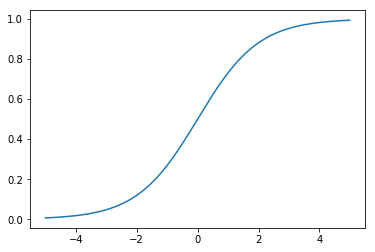

In [24]:
"""
지난주 복기

1) Supervised Learning consists of Classification and Regression 
2) kNN Algorithm mainly for Classification
3) Linear model for Regression 

Linear model은 모델의 예측 정확도에 대한 측도를 어떻게 결정하느냐에 따라 알고리즘이 세분화된다.
선형 회귀 모델들 중 지난주에 배운 것들은 다음과 같다 
: OLS(Ordinary Linear Square), Deming Regression, Ridge Regression, Lasso Regression, ElasticNet Regression

각각이 구분되는 기준은 정확도에 관한 측도의 차이였다. 측도는 다음으로 이루어진다.

- 3)-1 : (1) MSE(Mean Square Error) 
         (2) How to add L1 regulation and L2 regulation
 
------------------------------------------------------
이번주

4) Linear model for Binary Classification 

4)-1 Logistic Regression model for classification
4)-2 Linear SVM(Support Vector Machnine) --> 125pp에서 중점적으로 다룬다.

의학통계, 보험통계 등 많은 분야에서 쓰이는 Logistic Regression은 통계학 분야에서 나온 개념이다. 
머신러닝의 Logistic Regression은 통계학에서 나온 기술을 빌려온 것이다.
Logistic regression은 신경망과 다른 분류 알고리즘의 발상의 기초를 주므로 수학적 정리가 반드시 필요한 모델이다.
--> page 1~2

5) Note 5 things in Logistic Regression for Binary Classification 

5)-1 Binary Output Variable
 This might be obvious as we have already mentioned it, but logistic regression is intended for binary (two-class) classification problems.
It will predict the probability of an instance belonging to the default class, which can be snapped into a 0 or 1 classification.

5)-2 Remove Noise
Logistic regression assumes no error in the output variable (y), 
consider removing outliers and possibly misclassified instances from your training data.

5)-3 Gaussian Distribution
Logistic regression is a linear algorithm (with a non-linear transform on output).
It does assume a linear relationship between the input variables with the output.
Data transforms of your input variables that better expose this linear relationship can result in a more accurate model.
For example, you can use log, root, Box-Cox and other univariate transforms to better expose this relationship.

5)-4 Remove Correlated Inputs
Like linear regression, the model can overfit if you have multiple highly-correlated inputs. 
Consider calculating the pairwise correlations between all inputs and removing highly correlated inputs.

5)-5 Fail to Converge
It is possible for the expected likelihood estimation process that learns the coefficients to fail to converge.
This can happen if there are many highly correlated inputs in your data or the data is very sparse (e.g. lots of zeros in your input data).

6) What is Gradient Descent, SGD, Batch-way, Mini-batch way ? --> 98page 두번째 단락 읽기 / 83pp max-iter meaning(alpha down -> max-iter up)

6)-1 Gradient Descent and SGD conception

Gradient Descent is the process of minimizing a function by following the gradients of the cost function
This involves knowing the form of the cost as well as the derivative so that from a given point you know the gradient 
and can move in that direction, e.g. downhill towards the minimum value

In machine learning, we can use a technique that evaluates and updates the coefficients every iteration called
Stochastic Gradient Descent to minimize the error of a model on our training data.

The way this optimization algorithm works is that each training instance is shown to the model one at a time.
The model makes a prediction for a training instance, the error is calculated 
and the model is updated in order to reduce the error for the next prediction

This procedure can be used to find the set of coefficients in a model that result in the smallest error for model on the train data.

Each iteration, the coefficients(b) in machine Learning language are updated using the equation : 
b = b + learning_rate(alpha) * (y- yhat) * (1- yhat) * x

hyper-parameter : learning_rate(alpha)

--> paper 참고

6)-2 Strength of SGD

6)-2-1 The frequent updates immediately give an insight into the performance of the model and the rate of improvement.

6)-2-2 This variant of gradient descent may be the simplest to understand and implement, especially for beginners.

6)-2-3 The increased model update frequency can result in faster learning on some problems.

6)-2-4 The noisy update process can allow the model to avoid local minima (e.g. premature convergence).

6)-3 Weakness of SGD

6)-3-1 Updating the model so frequently is more computationally expensive than other configurations of gradient descent, 
taking significantly longer to train models on large datasets.

6)-3-2 The frequent updates can result in a noisy gradient signal, 
which may cause the model parameters and in turn the model error to jump around (have a higher variance over training epochs).

6)-3-3 The noisy learning process down the error gradient can also make it hard 
for the algorithm to settle on an error minimum for the model.

--------------------------------------------------------------
"""

from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

a = np.arange(-5,5,0.01)

def sigmoid(x):
    return 1 / (np.exp(-x)+1)
    
b = sigmoid(a)

plt.plot(a,b,label = 'sigmoid')

In [25]:
# Generate factitious model using make_forge() #

X,y = mglearn.datasets.make_forge()

print(X)
print()
print(y) 

[[ 9.96346605  4.59676542]
 [11.0329545  -0.16816717]
 [11.54155807  5.21116083]
 [ 8.69289001  1.54322016]
 [ 8.1062269   4.28695977]
 [ 8.30988863  4.80623966]
 [11.93027136  4.64866327]
 [ 9.67284681 -0.20283165]
 [ 8.34810316  5.13415623]
 [ 8.67494727  4.47573059]
 [ 9.17748385  5.09283177]
 [10.24028948  2.45544401]
 [ 8.68937095  1.48709629]
 [ 8.92229526 -0.63993225]
 [ 9.49123469  4.33224792]
 [ 9.25694192  5.13284858]
 [ 7.99815287  4.8525051 ]
 [ 8.18378052  1.29564214]
 [ 8.7337095   2.49162431]
 [ 9.32298256  5.09840649]
 [10.06393839  0.99078055]
 [ 9.50048972 -0.26430318]
 [ 8.34468785  1.63824349]
 [ 9.50169345  1.93824624]
 [ 9.15072323  5.49832246]
 [11.563957    1.3389402 ]]

[1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0]


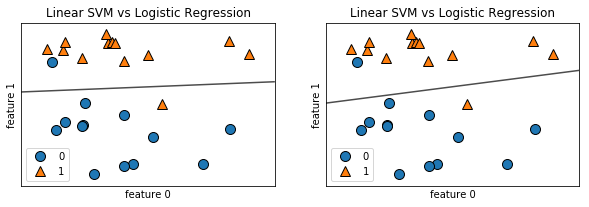

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC 

fig, axes = plt.subplots(1,2,figsize = (10,3))

for model, ax in zip([LinearSVC(),LogisticRegression()],axes):
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill=False,eps=0.5,ax=ax,alpha=0.7)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title("Linear SVM vs Logistic Regression")
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend()
axes[1].legend()

'\n아래의 세개의 그래프의 경계 분류를 보고 느끼는 점 \n만약에 예측변수가 많아진다면(차원이 높아진다면) SVM과 Logistic Regression model의 훈련데이터세트 정확도와 검증데이터 정확도는 어떻게 될까? \n\n'

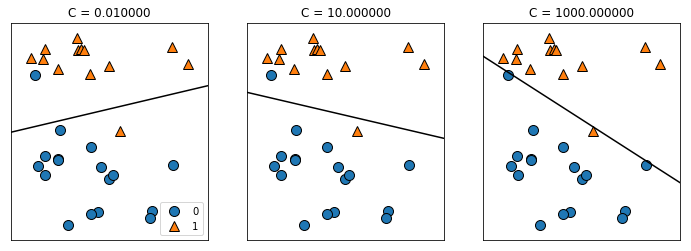

In [27]:
"""
결정 경계 주목 / SVM, Logistic Regression 모두 포인트 하나씩을 잘못 분류
SVM과 Logistic Regression 모두 L2 Regulation 사용
다만 규제의 강도를 추가적으로 결정하는 매개변수 C를 쓴다.

매개 변수 C에 대한 관점 1 : 
C가 높으면 raw data in trainset에 맞추려고 하며 C값을 낮추면 계수 추정치(beta)가 0에 가까워진다.  

매개 변수 C에 대한 관점 2 :
C가 낮으면 데이터 포인트 중 다수에 맞추려고 하며 C값을 높이면 데이터 포인트 중 다수에 맞추려고 한다.

"""

mglearn.plots.plot_linear_svc_regularization()

"""
아래의 세개의 그래프의 경계 분류를 보고 느끼는 점 
만약에 예측변수가 많아진다면(차원이 높아진다면) SVM과 Logistic Regression model의 훈련데이터세트 정확도와 검증데이터 정확도는 어떻게 될까? 

""" 


In [29]:
# Logistic Regression with Wisconsin Breast Cancer dataset #

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split 

cancer = load_breast_cancer()

# stratify : If not None, data is split in a stratified fashion, using this as the class labels.
X_train,X_test,y_train,y_test = train_test_split(cancer.data,
                                                 cancer.target, 
                                                 stratify = cancer.target, 
                                                 random_state=42) 


In [7]:
print("X_train.shape : {}".format(X_train.shape))
print("X_test.shape : {}".format(y_train.shape))
print("y_train.shape : {}".format(X_test.shape))
print("y_test.shape : {}".format(y_test.shape))

X_train.shape : (426, 30)
X_test.shape : (426,)
y_train.shape : (143, 30)
y_test.shape : (143,)


In [8]:
# http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html : LogisticRegression in sklearn documentary #

logreg = LogisticRegression().fit(X_train,y_train) # default value of C =1

"""
7) What is C value in Logistic Regression?

Regularization is applying a penalty to increasing the magnitude of parameter values in order to reduce overfitting.
When you train a model such as a logistic regression model, you are choosing parameters that give you the best fit to the data. 
this means minimizing the error between what the model predicts for your dependent variable given your data 
compared to what your dependent variable actually is.

The problem comes when you have a lot of parameters (a lot of independent variables) but not too much data.
In this case, the mode l will often tailor the parameter values to idiosyncrasies(특질) in your data 
-- which means it fits your data almost perfectly. 
However because those idiosyncrasies don't appear in future data you see, your model predicts poorly.

To solve this, as well as minimizing the error as already discussed, 
you add to what is minimized and also minimize a function that penalizes large values of the parameters.
Most often the function is λΣθj2, which is some constant λ times the sum of the squared parameter values θj2. 
The larger λ is the less likely 
it is that the parameters will be increased in magnitude simply to adjust for small perturbations in the data.
In your case however, rather than specifying λ, you specify C=1/λ.

8) relative relationship between C in Logistic Regression model and alpha in Regression model

"""

"\n7) What is C value in Logistic Regression?\n\nRegularization is applying a penalty to increasing the magnitude of parameter values in order to reduce overfitting.\nWhen you train a model such as a logistic regression model, you are choosing parameters that give you the best fit to the data. \nthis means minimizing the error between what the model predicts for your dependent variable given your data \ncompared to what your dependent variable actually is.\n\nThe problem comes when you have a lot of parameters (a lot of independent variables) but not too much data.\nIn this case, the mode l will often tailor the parameter values to idiosyncrasies(특질) in your data \n-- which means it fits your data almost perfectly. \nHowever because those idiosyncrasies don't appear in future data you see, your model predicts poorly.\n\nTo solve this, as well as minimizing the error as already discussed, \nyou add to what is minimized and also minimize a function that penalizes large values of the para

In [12]:
print("train set score : {}".format(logreg.score(X_train,y_train)))
print("test set score : {}".format(logreg.score(X_test,y_test))) 

"""
train set score ~~ test set score : 어떻게 판단해야 할까? --> 다시 57page 그림 2-1로 고고

"""

train set score : 0.9553990610328639
test set score : 0.958041958041958


'\ntrain set score ~~ test set score : 어떻게 판단해야 할까? --> 다시 57page 그림 2-1로 고고\n\n'

In [13]:
# C = 1 -> C=100(모델의 제약을 풀어줌) #

logreg100 = LogisticRegression(C=100).fit(X_train,y_train)
print("train set score : {}".format(logreg100.score(X_train,y_train)))
print("test set score : {}".format(logreg100.score(X_test,y_test))) 

train set score : 0.971830985915493
test set score : 0.965034965034965


In [14]:
# C=1 -> C=0.1(규제의 강도를 높이기 위해 C값을 낮춤) #

logreg001 = LogisticRegression(C=0.01).fit(X_train,y_train)
print("train set score : {}".format(logreg001.score(X_train,y_train)))
print("test set score : {}".format(logreg001.score(X_test,y_test))) 

train set score : 0.9342723004694836
test set score : 0.9300699300699301


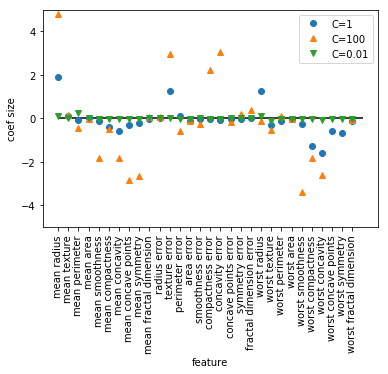

In [15]:
"""
visualization using matplot library :  
https://datascienceschool.net/view-notebook/d0b1637803754bb083b5722c9f2209d0/

"""
plt.plot(logreg.coef_.T,'o',label = "C=1")
plt.plot(logreg100.coef_.T,'^',label = "C=100")
plt.plot(logreg001.coef_.T,'v',label = "C=0.01")
# plt.xticks(label locations, text labels)
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names,rotation=90)
plt.hlines(0,0,cancer.data.shape[1])
plt.ylim(-5,5)
plt.xlabel("feature")
plt.ylabel("coef size")
plt.legend() 

Train set score using C= 0.001 and penalty = 'l1') : 0.9131455399061033
Test set score using C= 0.001 and penalty ='l1') : 0.9230769230769231
feature number : 3 with C=0.001
Train set score using C= 1 and penalty = 'l1') : 0.960093896713615
Test set score using C= 1 and penalty ='l1') : 0.958041958041958
feature number : 11 with C=1
Train set score using C= 100 and penalty = 'l1') : 0.9859154929577465
Test set score using C= 100 and penalty ='l1') : 0.9790209790209791
feature number : 23 with C=100


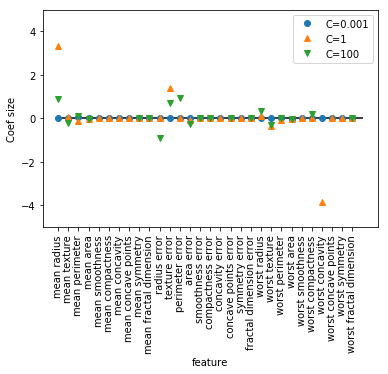

In [16]:
# Logistic Regression은 기본적으로 L2 규제를 사용하지만 이번에는 L1 규제를 사용 #
# -> 그래서 사용하는 특성의 수를 줄이겠다 #

for C, marker in zip([0.001,1,100],['o','^','v']):
    lr_l1 = LogisticRegression(C=C,penalty="l1").fit(X_train,y_train)
    print("Train set score using C= {} and penalty = 'l1') : {}".format(C, lr_l1.score(X_train,y_train)))
    print("Test set score using C= {} and penalty ='l1') : {}".format(C, lr_l1.score(X_test,y_test)))
    print("feature number : {} with C={}".format(np.sum(lr_l1.coef_ !=0),C))
    plt.plot(lr_l1.coef_.T,marker,label="C={}".format(C))

plt.xticks(range(cancer.data.shape[1]),cancer.feature_names,rotation=90)
plt.hlines(0,0,cancer.data.shape[1])
plt.xlabel("feature")
plt.ylabel("Coef size")

plt.ylim(-5,5)
plt.legend()

X : 
[[-7.72642091 -8.39495682]
 [ 5.45339605  0.74230537]
 [-2.97867201  9.55684617]
 [ 6.04267315  0.57131862]
 [-6.52183983 -6.31932507]
 [ 3.64934251  1.40687195]
 [-2.17793419  9.98983126]
 [ 4.42020695  2.33028226]
 [ 4.73695639  2.94181467]
 [-3.6601912   9.38998415]
 [-3.05358035  9.12520872]
 [-6.65216726 -5.57296684]
 [-6.35768563 -6.58312492]
 [-3.6155326   7.8180795 ]
 [-1.77073104  9.18565441]
 [-7.95051969 -6.39763718]
 [-6.60293639 -6.05292634]
 [-2.58120774 10.01781903]
 [-7.76348463 -6.72638449]
 [-6.40638957 -6.95293851]
 [-2.97261532  8.54855637]
 [-6.9567289  -6.53895762]
 [-7.32614214 -6.0237108 ]
 [-2.14780202 10.55232269]
 [-2.54502366 10.57892978]
 [-2.96983639 10.07140835]
 [ 3.22450809  1.55252436]
 [-6.25395984 -7.73726715]
 [-7.85430886 -6.09302499]
 [-8.1165779  -8.20056621]
 [-7.55965191 -6.6478559 ]
 [ 4.93599911  2.23422496]
 [ 4.44751787  2.27471703]
 [-5.72103161 -7.70079191]
 [-0.92998481  9.78172086]
 [-3.10983631  8.72259238]
 [-2.44166942  7.589537

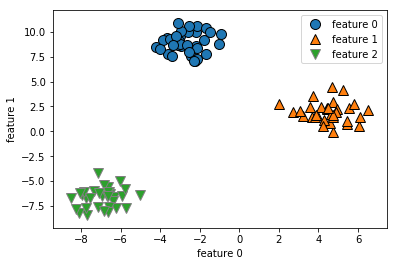

In [17]:
"""
6) Linear model for Multi-class classification

6)-1 What is Softmax function in Rogistic Regression?

--> paper 참고

6)-2 What is one-vs-rest? : pp93~94

one-vs-rest(일대다) 방법은 각 클래스를 다른 모든 클래스와 구분되도록 이진 분류 모델을 학습시킨다.
결국 클래스의 수만큼 이진 분류 모델이 만들어진다.

""" 

from sklearn.datasets import make_blobs

# Generate data(Three classes,two diemsion) that follows Gaussian distribution

X,y = make_blobs(random_state=42)

print("X : \n{}".format(X))
print()
print("y : \n{}".format(y))
print()

mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.legend(["feature 0","feature 1","feature 2"])

In [18]:
linear_svm = LinearSVC().fit(X,y)
print("coef size : {}".format(linear_svm.coef_.shape)) # coef size : (3, 2)
print("intercept size : {}".format(linear_svm.intercept_.shape)) # intercept size : (3,)

coef size : (3, 2)
intercept size : (3,)


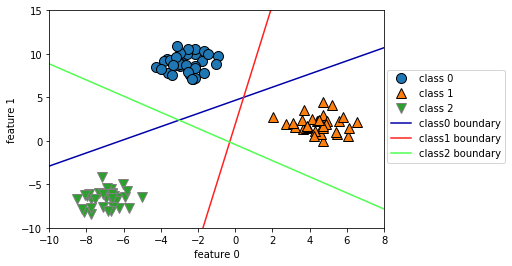

In [19]:
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line = np.linspace(-15,15) # -15 ~ 15 사이에 default value(50개)만큼의 수를 채워 넣는다.
for coef, intercept, color in zip(linear_svm.coef_,linear_svm.intercept_,mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1],c=color)
    
plt.ylim(-10,15)
plt.xlim(-10,8)
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.legend(['class 0', 'class 1', 'class 2', 'class0 boundary','class1 boundary','class2 boundary'],loc = (1.01,0.3))

# 'class0 boundary','class0 boundary',''class0 boundary'를 주의 깊게 살펴 보자 # 

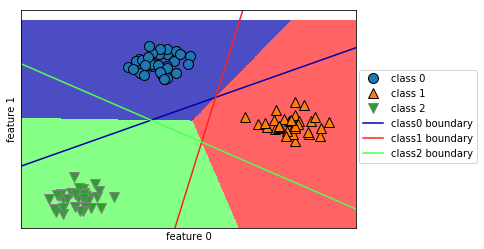

In [20]:
mglearn.plots.plot_2d_classification(linear_svm,X,fill=True,alpha = 0.7)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line = np.linspace(-15,15) # -15 ~ 15 사이에 default value(50개)만큼의 수를 채워 넣는다.
for coef, intercept, color in zip(linear_svm.coef_,linear_svm.intercept_,mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1],c=color)
    
plt.ylim(-10,15)
plt.xlim(-10,8)
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.legend(['class 0', 'class 1', 'class 2', 'class0 boundary','class1 boundary','class2 boundary'],loc = (1.01,0.3))


In [21]:
"""
7) Linear model for classification의 한계 
--> 세상은 직선으로 예측하기 쉽지 않은 복잡계 
--> Nonlinear model의 등장 
--> 신경망 모델의 난제[층을 깊게 할 수 없다는 점]의 수학적 해결(By Hinton in Toronto uni)
--> 해결과 동시에 폭발적 성장(2000년 중반~ 현재까지 학계의 지배적 위치 확보 및
모든 관련 산업(IT,제조업,유통업,광물업 등등)에 핵심 알고리즘으로 탑재중)

"""

'\n7) Linear model for classification의 한계 \n--> 세상은 직선으로 예측하기 쉽지 않은 복잡계 \n--> Nonlinear model의 등장 \n--> 신경망 모델의 난제[층을 깊게 할 수 없다는 점]의 수학적 해결(By Hinton in Toronto uni)\n--> 해결과 동시에 폭발적 성장(2000년 중반~ 현재까지 학계의 지배적 위치 확보 및\n모든 관련 산업(IT,제조업,유통업,광물업 등등)에 핵심 알고리즘으로 탑재중)\n\n'